## 1. Execute one of the following cell to pick AGs results to be plotted

### Specify 
- datasets that should be loaded, and the label you want to assign to them (eg GAN, GAN_versionXX ...)
- output directory name (will be created if needed)
- SNP position file(s)  
- number of individuals to keep from each dataset (will be randomly subampled if less than the total number)

## 2. Imports and general color dictionary

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import importlib
import os
from short import plot_utils as plu
dirscript = 'short'

In [2]:
repoDIR = "./"

DATA = "UKBB"

if DATA == "1KG":
    samplesDIR = "../../results/1KG/8020"
    outDir = repoDIR + "FIGS/1KG/"
    nsub = 5008
    infiles = {'Real': samplesDIR + "/data/8020_test.hapt",
            'Truth': samplesDIR + "/data/8020_train.hapt",
            'Indep': samplesDIR + "/indep/10K_indep_8020_samples.hapt",
            'Markov':  samplesDIR + "/markov/10K_markov_8020_samples.hapt",
            'HMM': samplesDIR + "/hmm/10K_hmm_8020_samples3.hapt",
            'WGAN': samplesDIR + "/wgan/10K_wgan_8020_samples.hapt",
            'RBM': samplesDIR + "/rbm/10K_rbm_8020_samples.hapt",
            'GPC': samplesDIR + "/hclt/10K_hclt_8020_samples.hapt"
            }
    realposfname = "../../aux/10K_SNP.legend"

elif DATA == "UKBB":
    samplesDIR = "../../results/UKBB/8020"
    outDir = repoDIR + "FIGS/UKBB/"
    nsub = 21540
    infiles = {'Real': samplesDIR + "/data/8020_test.hapt",
            'Truth': samplesDIR + "/data/8020_train.hapt",
            'Indep': samplesDIR + "/indep/UKBB_indep_8020_samples.hapt",
            'Markov':  samplesDIR + "/markov/UKBB_markov_8020_samples.hapt",
            'HMM': samplesDIR + "/hmm/UKBB_hmm_8020_samples.hapt",
            'WGAN': samplesDIR + "/wgan/UKBB_wgan_8020_samples.hapt",
            'RBM': samplesDIR + "/rbm/UKBB_rbm_8020_samples.hapt",
            'GPC': samplesDIR + "/hclt/UKBB_hclt_8020_samples.hapt"
            }
    realposfname = "../../aux/UKBB_SNP.legend" 

# same SNP positions for all datasets so it is just repeated for all keys:
position_fname = {key:realposfname for key in infiles.keys()} 

print("- Datasets under study:\n", infiles)

# same SNP positions for all datasets so it is just repeated for all keys:
position_fname = {key:realposfname for key in infiles.keys()} 

- Datasets under study:
 {'Real': '../../results/UKBB/8020/data/8020_test.hapt', 'Truth': '../../results/UKBB/8020/data/8020_train.hapt', 'Indep': '../../results/UKBB/8020/indep/UKBB_indep_8020_samples.hapt', 'Markov': '../../results/UKBB/8020/markov/UKBB_markov_8020_samples.hapt', 'HMM': '../../results/UKBB/8020/hmm/UKBB_hmm_8020_samples.hapt', 'WGAN': '../../results/UKBB/8020/wgan/UKBB_wgan_8020_samples.hapt', 'RBM': '../../results/UKBB/8020/rbm/UKBB_rbm_8020_samples.hapt', 'GPC': '../../results/UKBB/8020/hclt/UKBB_hclt_8020_samples.hapt'}


- Output Directory for figures: ./FIGS/UKBB/
 - Real dataset positions: ../../aux/UKBB_SNP.legend
 - Sample size:21540


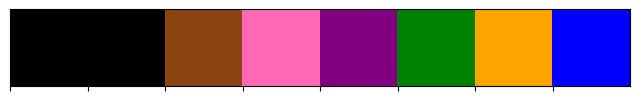

In [3]:
# General colors
# allcolpal = dict({'Real':"#95a5a6",
#                   'Truth': "#95a5a6",
#                   'WGAN':"#3498db", 
#                   'RBM':"#e74c3c", 
#                   'Indep': "#2ecc71",
#                   'Markov': "#a6761d",
#                   'HMM': 'gold',
#                   'PC': '#6a3d9a'
#               })

allcolpal = dict({'Real':"black",
                  'Truth': "black",
                  'WGAN':"green", 
                  'RBM':"orange", 
                  'Indep': "saddlebrown",
                  'Markov': "hotpink",
                  'HMM': 'purple',
                  'GPC': 'blue'
              })

# Update current color palette to the dataset type in infiles 
colpal =  {key:allcolpal[key] for key in infiles.keys()}
sns.set_palette(colpal.values())

sns.palplot(sns.color_palette())
print(f"- Output Directory for figures: {outDir}\n",
      f"- Real dataset positions: {realposfname}\n",
      f"- Sample size:{nsub}")


## 3. run notebook to plot all figures or a subset of sumstats (for faster results)

In [4]:
f"Figures will be saved in {outDir} or its subdirectories"

'Figures will be saved in ./FIGS/UKBB/ or its subdirectories'

In [5]:
## Print one more time the name of datasets that will be loaded
## the path should exist otherwise you need to check that your setup is correct
for x in [f"- Input file {f} exists: {os.path.exists(f)}" for f in infiles.values()]:
    print(x)

- Input file ../../results/UKBB/8020/data/8020_test.hapt exists: True
- Input file ../../results/UKBB/8020/data/8020_train.hapt exists: True
- Input file ../../results/UKBB/8020/indep/UKBB_indep_8020_samples.hapt exists: True
- Input file ../../results/UKBB/8020/markov/UKBB_markov_8020_samples.hapt exists: True
- Input file ../../results/UKBB/8020/hmm/UKBB_hmm_8020_samples.hapt exists: True
- Input file ../../results/UKBB/8020/wgan/UKBB_wgan_8020_samples.hapt exists: True
- Input file ../../results/UKBB/8020/rbm/UKBB_rbm_8020_samples.hapt exists: True
- Input file ../../results/UKBB/8020/hclt/UKBB_hclt_8020_samples.hapt exists: True


In [6]:
# Setup options (transformations, sumstats to compute etc) and output directory (automatically derived from maintOutDir)

importlib.reload(plu) # useful only if plot_utils is changed since you imported it for dev reason
boolComputeAATS = True # if False notebook 5 will reload previously computed AATS instead of computing it
figwi = 12 # control size of some figures 

# set allchecks to False for a first rapid scan
# set to True for computing/plotting all sumstats and scores (long, better on a cluster)
allchecks = False

# pick the transformations you want to apply to the datasets
# For no transformation choose 
# transformations=None
transformations={'to_minor_encoding':False, 'min_af': 0, 'max_af': 1}

if not transformations is None:
    tname=';'.join([f'{k}-{v}' for k,v in transformations.items()])
else:
    tname = 'none'
tname=tname + ';allchecks-' + str(int(allchecks)) + ';n-' + str(nsub)
outDir = outDir = os.path.join(outDir, tname+'/')
print(f"- Figures will be saved in {outDir}")
if os.path.exists(outDir):
    print('    - This directory exists, the following files might be overwritten:')
    print('    -', os.listdir(outDir))

- Figures will be saved in ./FIGS/UKBB/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-21540/
    - This directory exists, the following files might be overwritten:
    - ['settings.json', 'AC_generated_vs_Real_zoom.pdf', 'AC_generated_vs_Real.pdf', 'PCA_allel_compare_models_Combined PCA.pdf', 'PCA_densities_compare_Combined PCA.pdf', 'PCA_allel_compare_models_Coupled PCA.pdf', 'PCA_densities_compare_Coupled PCA.pdf', 'wasserstein_PCA_coupled_PCA.csv', 'wasserstein2D_PCA_coupled_PCA.csv', 'scores_all_PCA.csv', 'LD_generated_vs_real_intersectSNP.pdf', 'LD_HEATMAP_intersectSNP_bounds=None-None_mirror=True_diff=False.pdf', 'LD_HEATMAP_intersectSNP_bounds=None-None_mirror=True_diff=True.pdf', 'LD_HEATMAP_intersectSNP_bounds=None-None_mirror=False_diff=False.pdf', 'dist_Real_Real.npz', 'dist_Truth_Real.npz', 'dist_Truth_Truth.npz', 'dist_Indep_Real.npz', 'dist_Indep_Indep.npz', 'dist_Markov_Real.npz', 'dist_Markov_Markov.npz', 'dist_HMM_Real.npz', 'dist_HMM_HMM.npz', 'dist_WGAN_Real

### Compute summary statistics
**You can pick which notebooks to execute** (and comment the other lines)  
Only the **first one is mandatory**  (plotfig_utils_1_INIT.ipynb)  
It loads datasets, applies basic transformations if asked, and initializes a few variables (such as a dictionnary of haplotypes, allele counts, fixed site vectors, etc)


#################### INIT ####################
- color panel is {'Real': 'black', 'Truth': 'black', 'Indep': 'saddlebrown', 'Markov': 'hotpink', 'HMM': 'purple', 'WGAN': 'green', 'RBM': 'orange', 'GPC': 'blue'}
- infile is dict_keys(['Real', 'Truth', 'Indep', 'Markov', 'HMM', 'WGAN', 'RBM', 'GPC'])


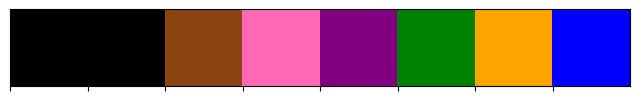

- Loading data...
    - Real (5384, 9822) loaded from ../../results/UKBB/8020/data/8020_test.hapt
    - Truth (21540, 9822) loaded from ../../results/UKBB/8020/data/8020_train.hapt
    - Indep (10000, 9822) loaded from ../../results/UKBB/8020/indep/UKBB_indep_8020_samples.hapt
    - Markov (10000, 9822) loaded from ../../results/UKBB/8020/markov/UKBB_markov_8020_samples.hapt
    - HMM (10000, 9822) loaded from ../../results/UKBB/8020/hmm/UKBB_hmm_8020_samples.hapt
    - WGAN (10000, 9822) loaded from ../../results/UKBB/8020/wgan/UKBB_wgan_8020_samples.hapt
    - RBM (10000, 9822) loaded from ../../results/UKBB/8020/rbm/UKBB_rbm_8020_samples.hapt
    - GPC (10000, 9822) loaded from ../../results/UKBB/8020/hclt/UKBB_hclt_8020_samples.hapt
- Dictionnary of datasets: 8
- Check whether some sites are fixed
    - 21 fixed sites in Real
    - 0 fixed sites in Truth
    - 7 fixed sites in Indep
    - 222 fixed sites in Markov
    - 13 fixed sites in HMM
    - 1379 fixed sites in WGAN
    - 1 f

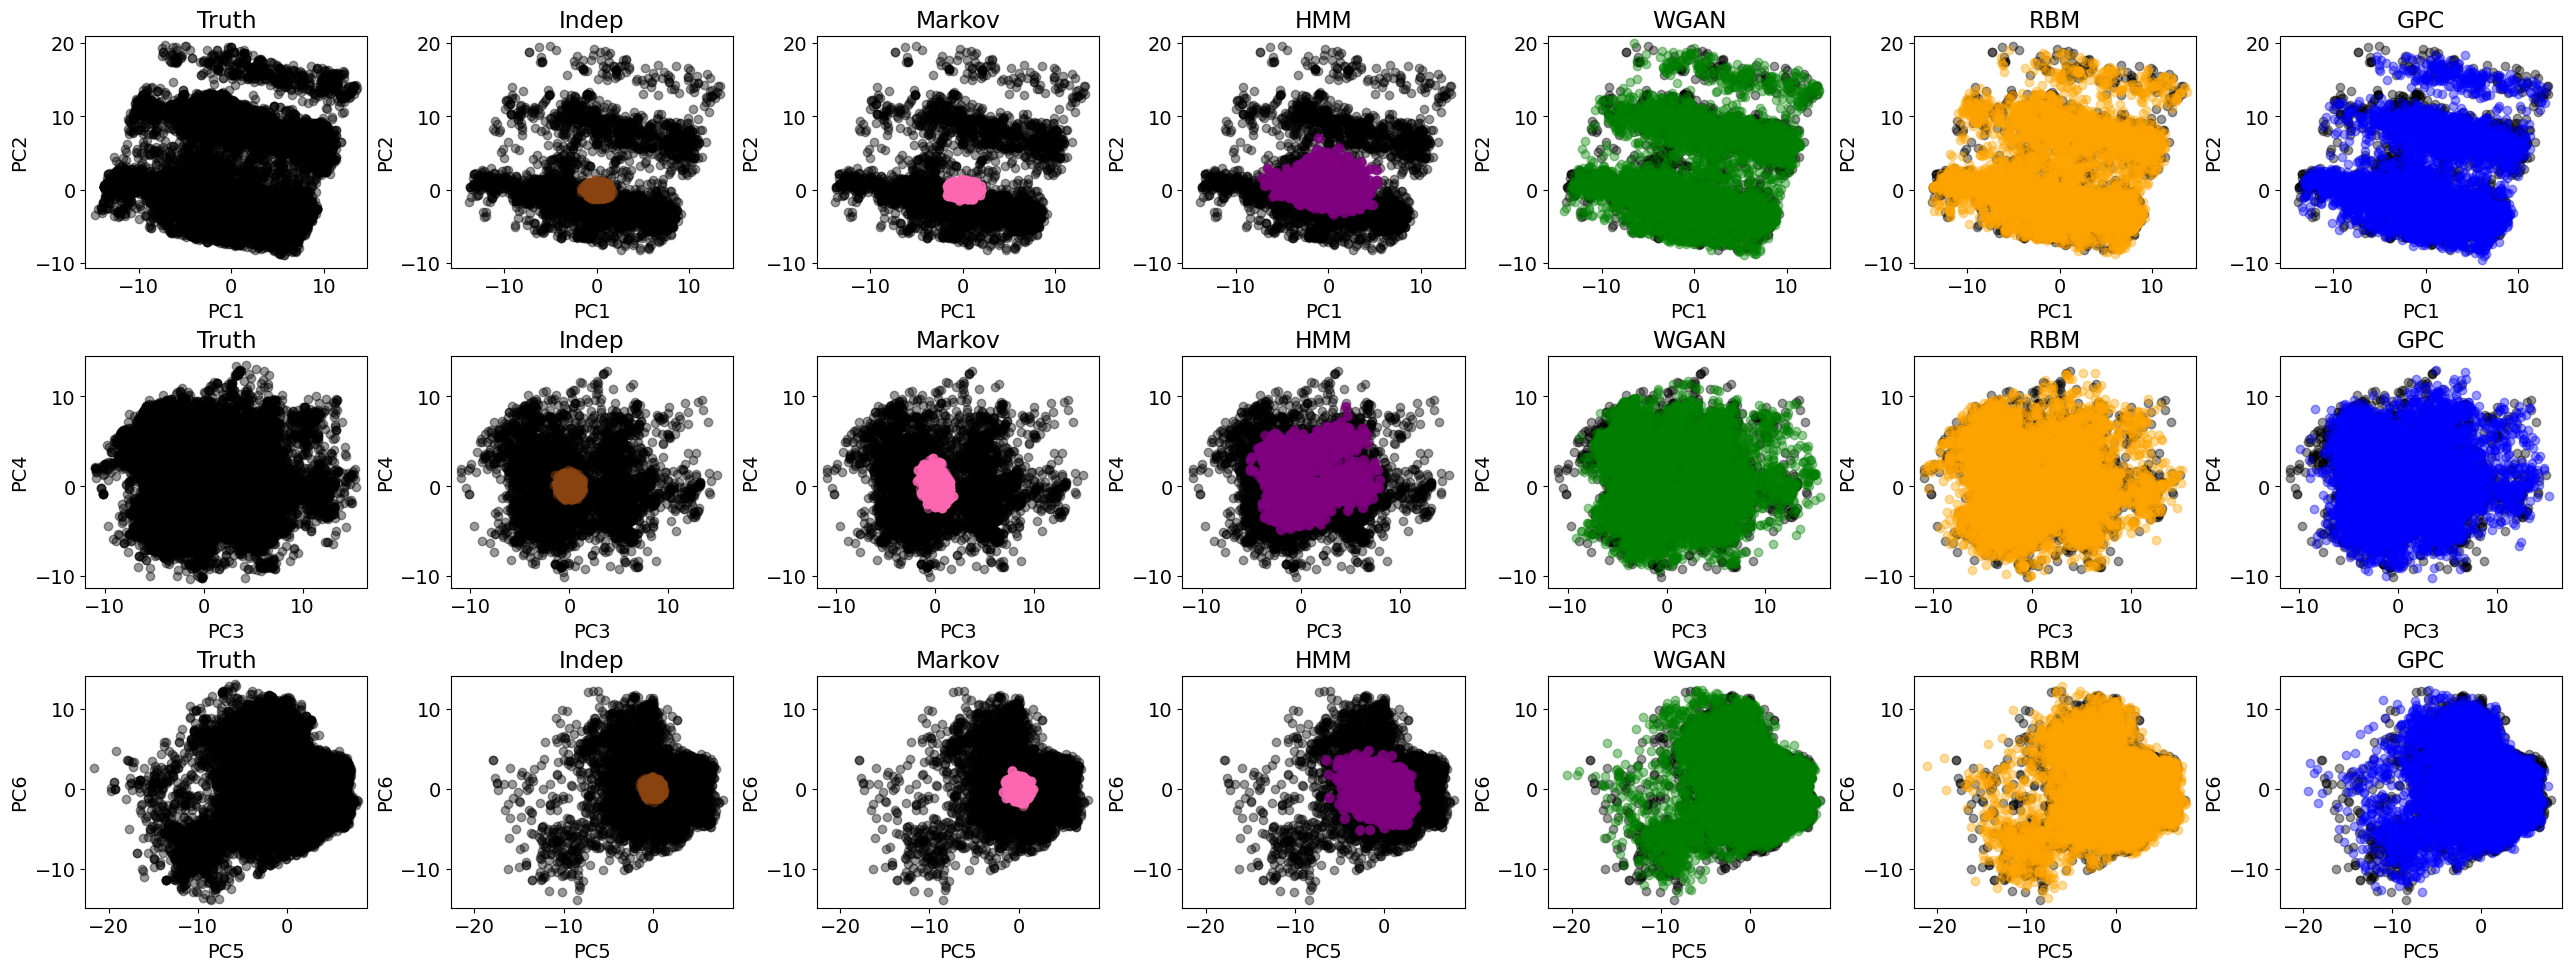

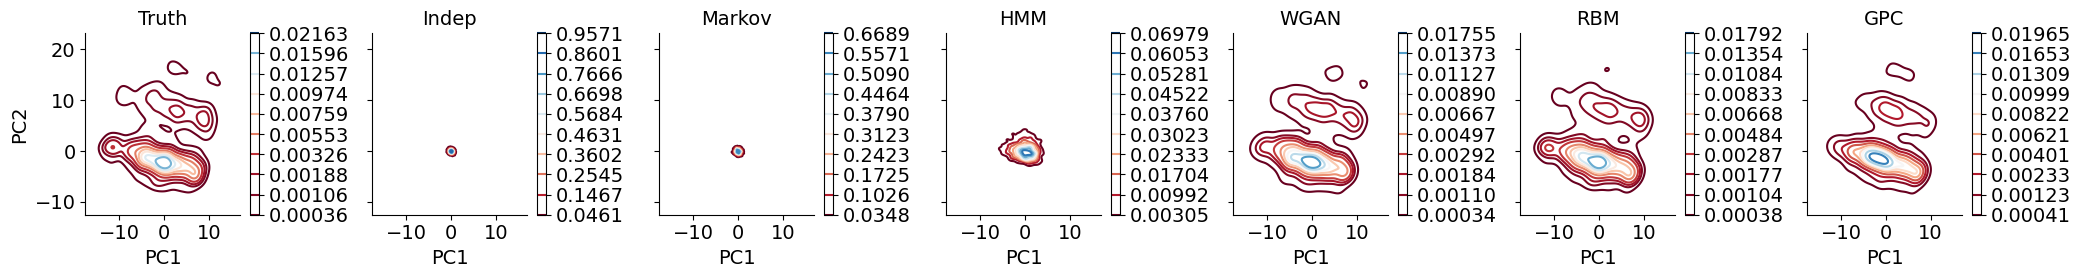

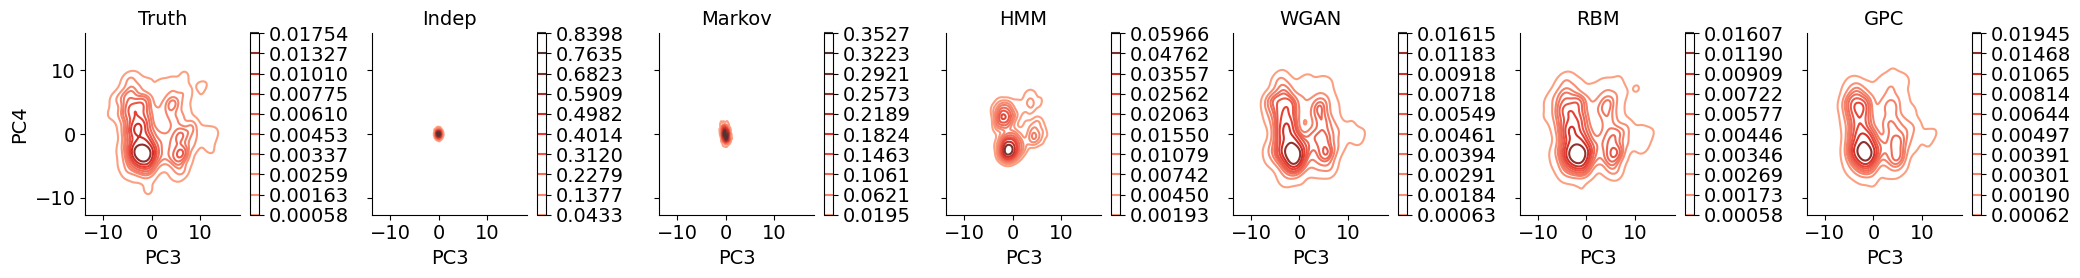

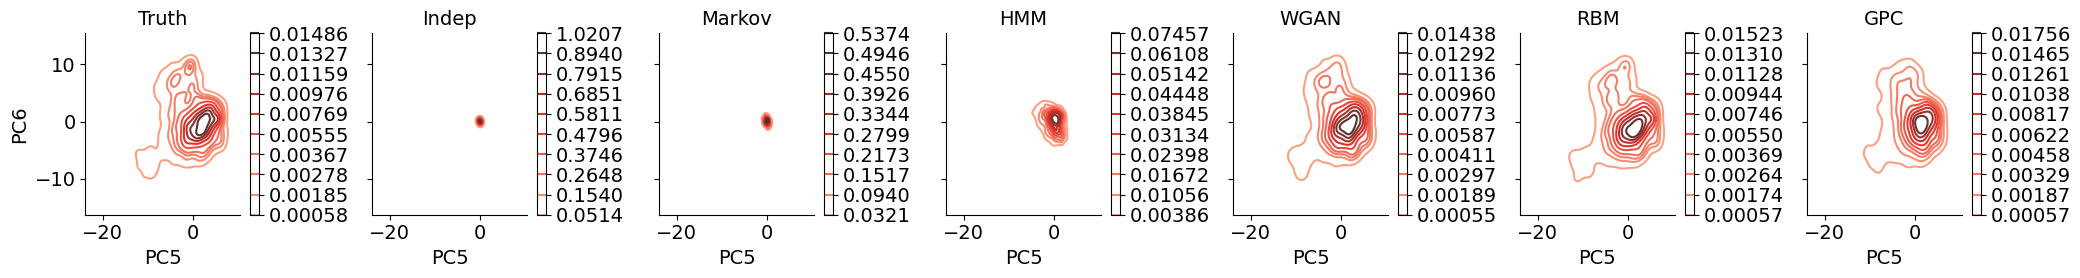

Computing Coupled PCA ...
    - PCA superpose file saved in ./FIGS/UKBB/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-21540/PCA_allel_compare_models_Coupled PCA.pdf
    - PCA density file saved in ./FIGS/UKBB/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-21540/PCA_densities_compare_Coupled PCA.pdf


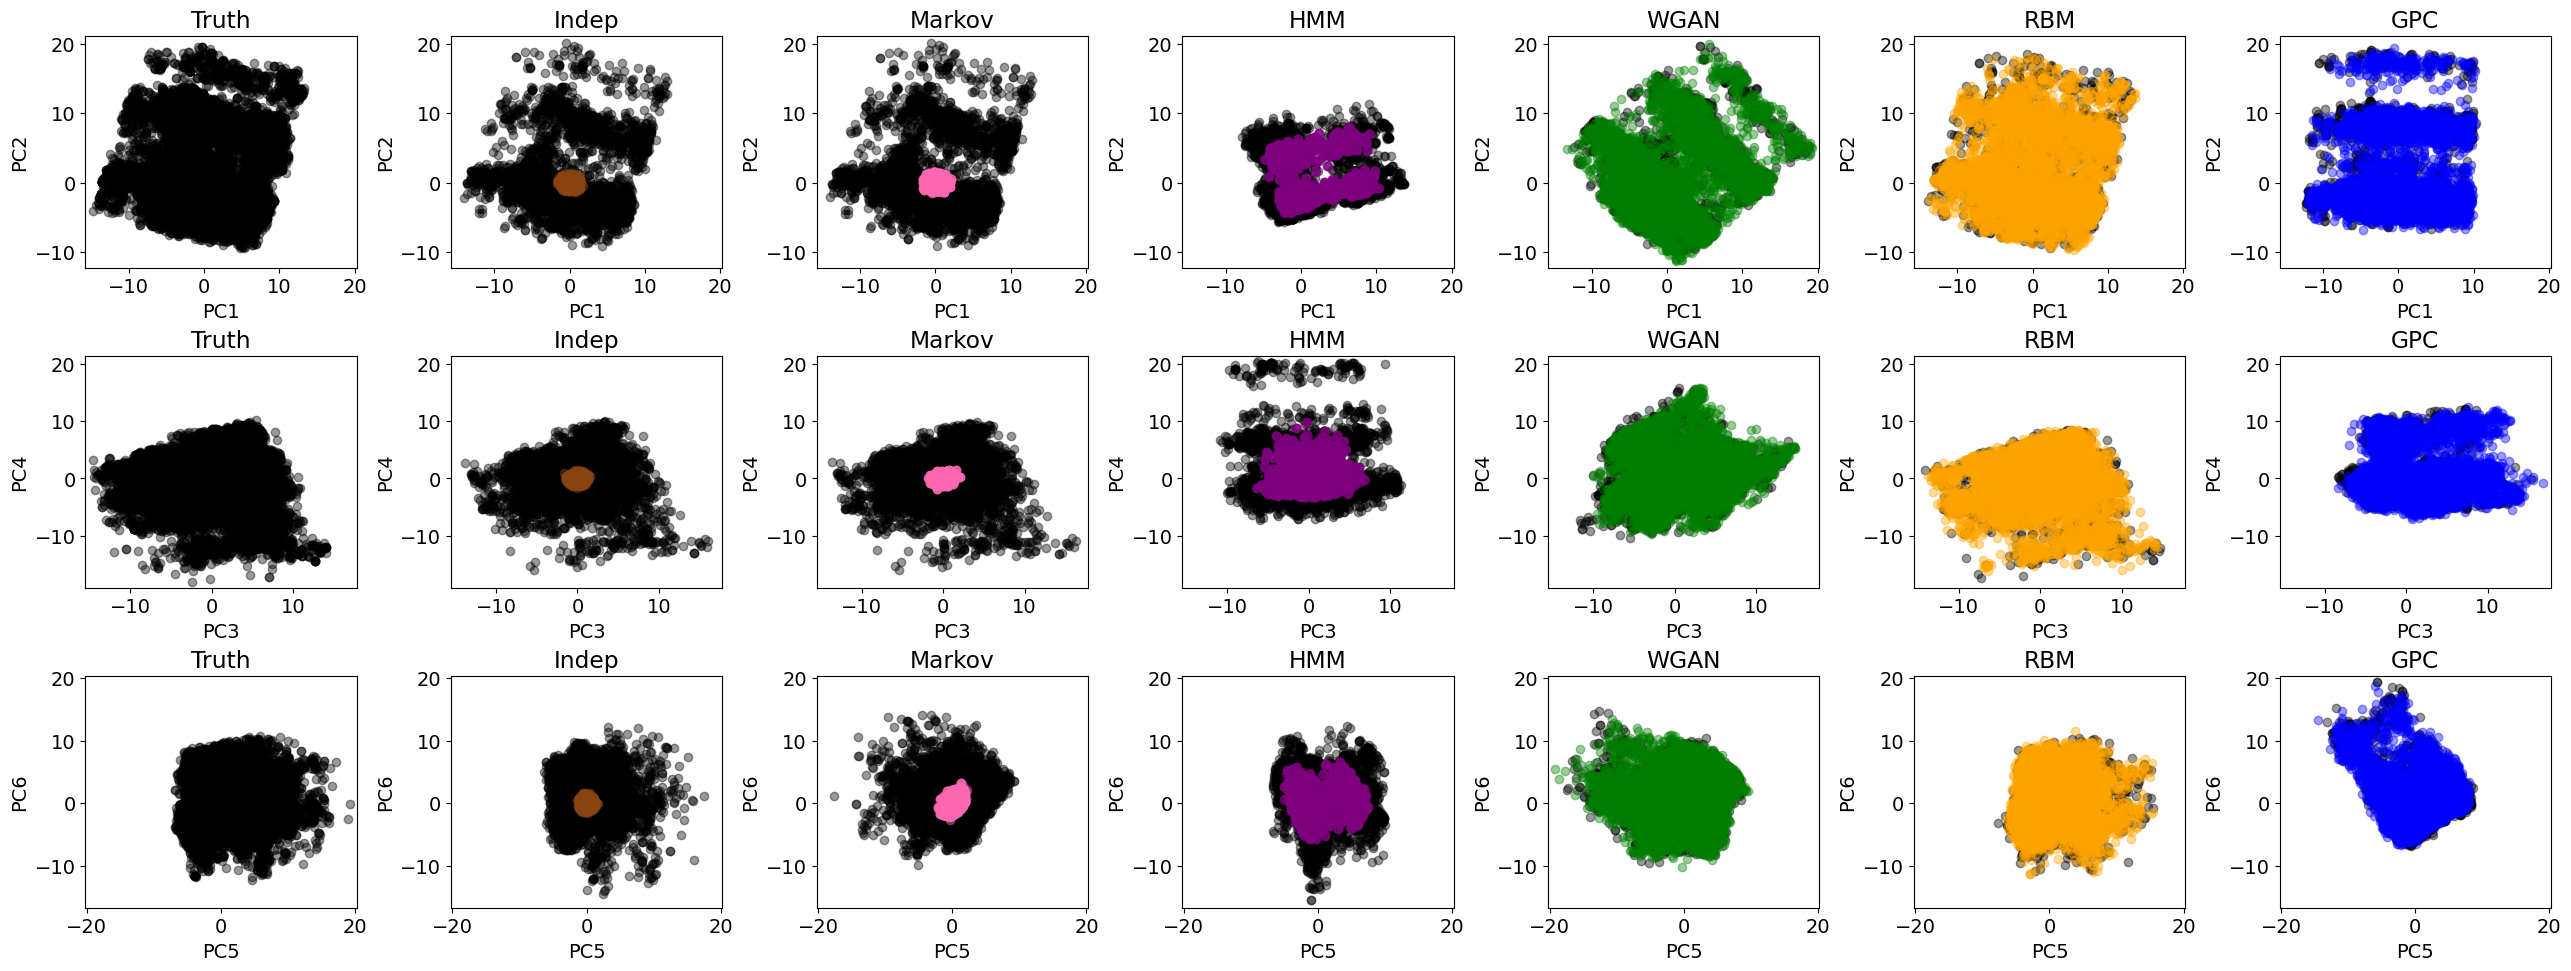

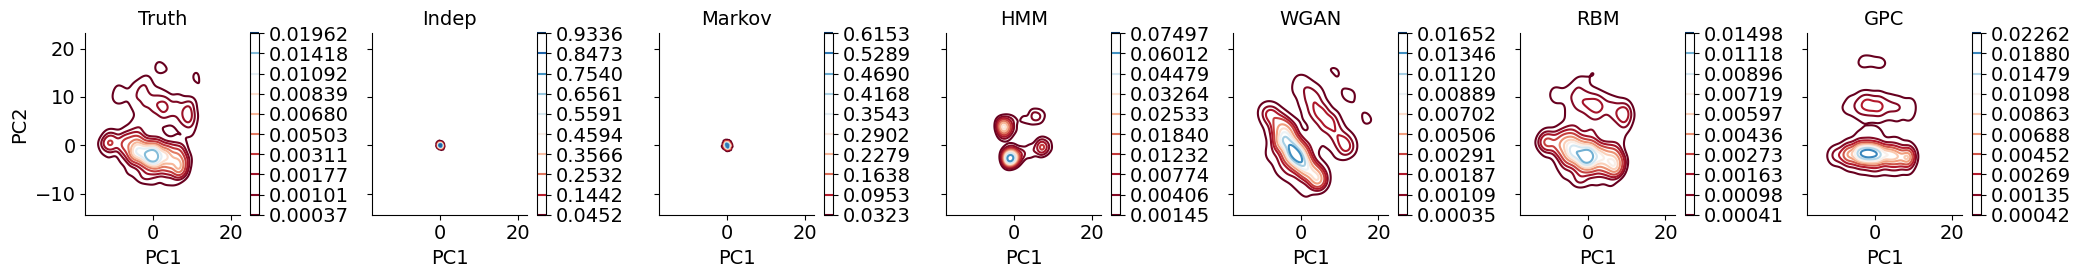

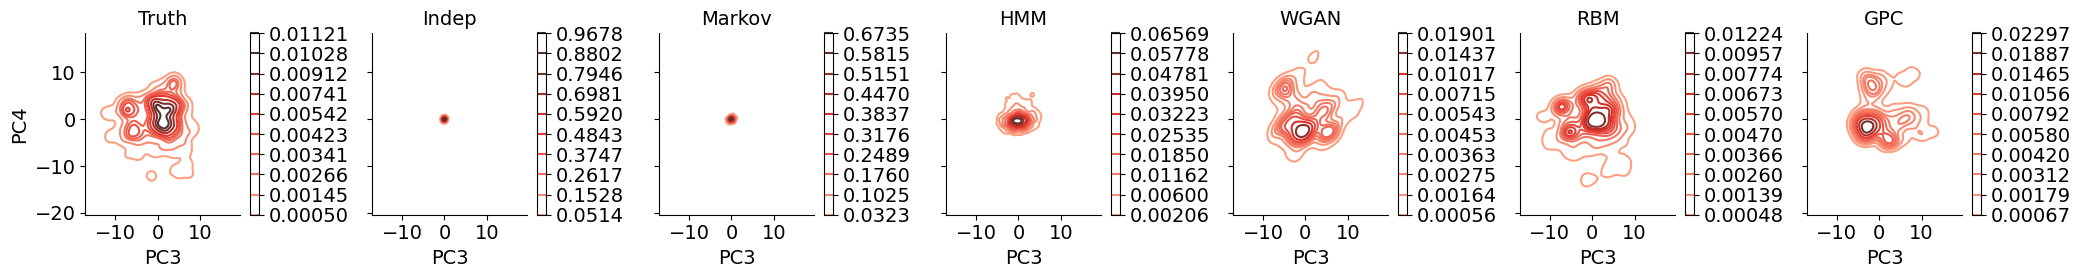

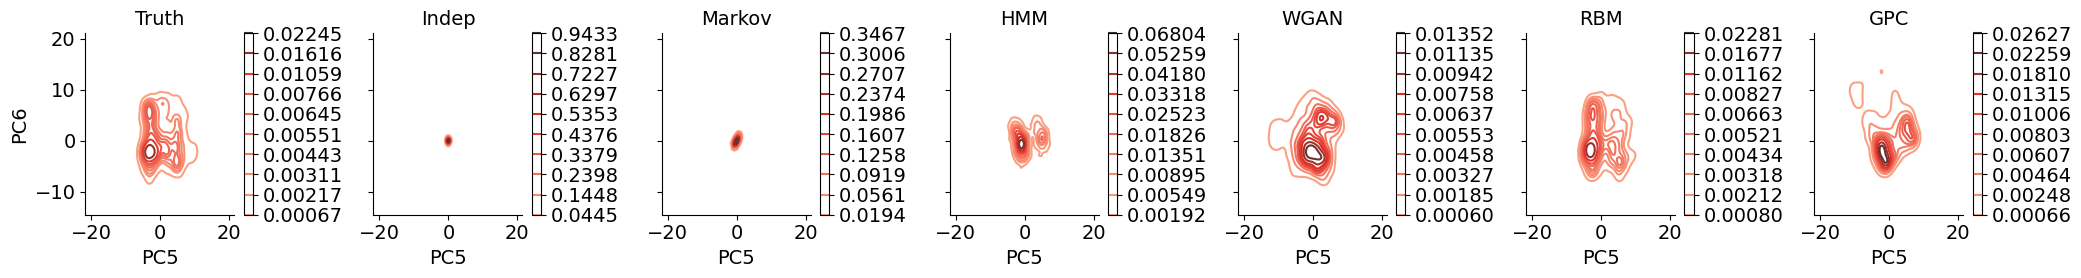

wasserstein
10768
10768
21540
5384
10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':method}, ignore_index=True)
/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':method}, ignore_index=True)
/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':metho

10000
5384
10000
5384
10000
5384
10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':method}, ignore_index=True)
/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':method}, ignore_index=True)
/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'pvalue':None, 'label':key, 'PC':pc+1, 'method':metho

10000
5384
Scorelist-wasserstein            stat  statistic pvalue   label PC       method
0   wasserstein   0.000000   None    Real  1  coupled_PCA
1   wasserstein   0.000000   None    Real  2  coupled_PCA
2   wasserstein   0.000000   None    Real  3  coupled_PCA
3   wasserstein   0.000000   None    Real  4  coupled_PCA
4   wasserstein   0.000000   None    Real  5  coupled_PCA
5   wasserstein   0.000000   None    Real  6  coupled_PCA
6   wasserstein   0.116515   None   Truth  1  coupled_PCA
7   wasserstein   0.042201   None   Truth  2  coupled_PCA
8   wasserstein   0.098603   None   Truth  3  coupled_PCA
9   wasserstein   0.067678   None   Truth  4  coupled_PCA
10  wasserstein   0.053354   None   Truth  5  coupled_PCA
11  wasserstein   0.050569   None   Truth  6  coupled_PCA
12  wasserstein   3.608361   None   Indep  1  coupled_PCA
13  wasserstein   3.297720   None   Indep  2  coupled_PCA
14  wasserstein   3.193487   None   Indep  3  coupled_PCA
15  wasserstein   2.913378   None   Ind

/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 10768 10768 115949824
>>> computePCAdist begin <<<, stat=wasserstein2D
 Real 0.0018751613380713534 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 10768 10768 115949824
>>> computePCAdist begin <<<, stat=wasserstein2D
 Real 0.0018457847655327607 
>>> computePCAdist end <<<

21540
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 21540 115971360
>>> computePCAdist begin <<<, stat=wasserstein2D
 Truth 0.0018670459376463507 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 21540 115971360
>>> computePCAdist begin <<<, stat=wasserstein2D
 Truth 0.0019382102929721792 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 21540 115971360
>>> computePCAdist begin <<<, stat=wasserstein2D
 Truth 0.0019210260392733837 
>>> computePCAdist end <<<

10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 Indep 0.09089689539555013 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 Indep 0.06558394050834335 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 Indep 0.06341690465784904 
>>> computePCAdist end <<<

10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 Markov 0.08458215436868666 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 Markov 0.0634229050823216 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 Markov 0.0542236986917314 
>>> computePCAdist end <<<

10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 HMM 0.0071636893616827775 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 HMM 0.02443622810547343 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 HMM 0.011673770897212131 
>>> computePCAdist end <<<

10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 WGAN 0.002230019527138571 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 WGAN 0.002193914754369216 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 WGAN 0.0021291256887964126 
>>> computePCAdist end <<<

10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 RBM 0.0020741687023014444 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 RBM 0.002151617347154397 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 RBM 0.0020369282928837133 
>>> computePCAdist end <<<

10000
5384


/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 GPC 0.0024003423173308024 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 GPC 0.0026306523344521997 
>>> computePCAdist end <<<



/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


>>> computePCAdist begin <<<, 
 Size of a b M 5384 10000 53840000
>>> computePCAdist begin <<<, stat=wasserstein2D
 GPC 0.0022641898278979405 
>>> computePCAdist end <<<

Scorelist-wasserstein2D              stat  statistic pvalue   label   PC       method    reg
0   wasserstein2D   0.001788    NaN    Real  1-2  coupled_PCA  0.002
1   wasserstein2D   0.001875    NaN    Real  3-4  coupled_PCA  0.002
2   wasserstein2D   0.001846    NaN    Real  5-6  coupled_PCA  0.002
3   wasserstein2D   0.001867    NaN   Truth  1-2  coupled_PCA  0.002
4   wasserstein2D   0.001938    NaN   Truth  3-4  coupled_PCA  0.002
5   wasserstein2D   0.001921    NaN   Truth  5-6  coupled_PCA  0.002
6   wasserstein2D   0.090897    NaN   Indep  1-2  coupled_PCA  0.002
7   wasserstein2D   0.065584    NaN   Indep  3-4  coupled_PCA  0.002
8   wasserstein2D   0.063417    NaN   Indep  5-6  coupled_PCA  0.002
9   wasserstein2D   0.084582    NaN  Markov  1-2  coupled_PCA  0.002
10  wasserstein2D   0.063423    NaN  Markov  3

/scratch2/prateek/genetic_pc_github/plots/structure/short/plot_utils.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Scores = Scores.append({'stat':stat, 'statistic':sc, 'reg':reg, 'label':key, 'PC':f'{pc+1}-{pc+2}', 'method':method}, ignore_index=True)


  method   bin_left  n_pairs_true  n_pairs_method   LD_true  LD_method  \
0  Truth   1.000000            91              91  0.285107   0.284853   
1  Truth   2.114979            58              58  0.160019   0.159730   
2  Truth   4.473135           154             154  0.191105   0.191011   
3  Truth   9.460585           273             273  0.198204   0.198670   
4  Truth  20.008937           584             584  0.156459   0.155943   

   abs_error      sq_error  
0   0.000254  6.452615e-08  
1   0.000289  8.350737e-08  
2   0.000094  8.845753e-09  
3   0.000465  2.165761e-07  
4   0.000516  2.661840e-07  
****************************************************************
*** Computation and plotting LD DONE. Figures saved in ./FIGS/UKBB/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-21540/ ***
****************************************************************


In [7]:
%run -p {dirscript}/plotfig_utils_1_INIT.ipynb  # mandatory, all lines below are optional
# %run -p {dirscript}/plotfig_utils_2_AF.ipynb 
%run -p {dirscript}/plotfig_utils_3_PCA.ipynb
%run -p {dirscript}/plotfig_utils_4_LD.ipynb


#################### DIST AATS ####################
- Computing pairwise distances and minimal distances and saving to compressed files...


boolComputeAATS: False
Loading precomputed AATS and MINDIST
AATS obtained


/scratch2/prateek/tmp/ipykernel_3396995/153427379.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset, hist=False, kde=True,
/scratch2/prateek/tmp/ipykernel_3396995/153427379.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append({'stat': 'wasserstein', 'statistic': sc, 'pvalue': None,
/scratch2/prateek/tmp/ipykernel_3396995/153427379.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibilit

    - Saved ./FIGS/UKBB/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-21540/haplo_pairw_distrib_within.pdf


/scratch2/prateek/tmp/ipykernel_3396995/153427379.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset, hist = False, kde = True,
/scratch2/prateek/tmp/ipykernel_3396995/153427379.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append({'stat':'wasserstein','statistic':sc, 'pvalue':None,  'label':cat, 'comparaison':'between'}, ignore_index=True)
/scratch2/prateek/tmp/ipykernel_3396995/153427379.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either

    - Saved ./FIGS/UKBB/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-21540/haplo_pairw_distrib_between.pdf
           stat   statistic pvalue   label comparaison
0   wasserstein    3.574788   None   Truth      within
1   wasserstein  168.877908   None   Indep      within
2   wasserstein  164.547493   None  Markov      within
3   wasserstein  117.914241   None     HMM      within
4   wasserstein   25.164226   None    WGAN      within
5   wasserstein   49.518160   None     RBM      within
6   wasserstein   20.856656   None     GPC      within
7   wasserstein    1.808673   None   Truth     between
8   wasserstein   80.201082   None   Indep     between
9   wasserstein   79.359299   None  Markov     between
10  wasserstein   64.246928   None     HMM     between
11  wasserstein   13.080696   None    WGAN     between
12  wasserstein   25.814147   None     RBM     between
13  wasserstein   11.884090   None     GPC     between


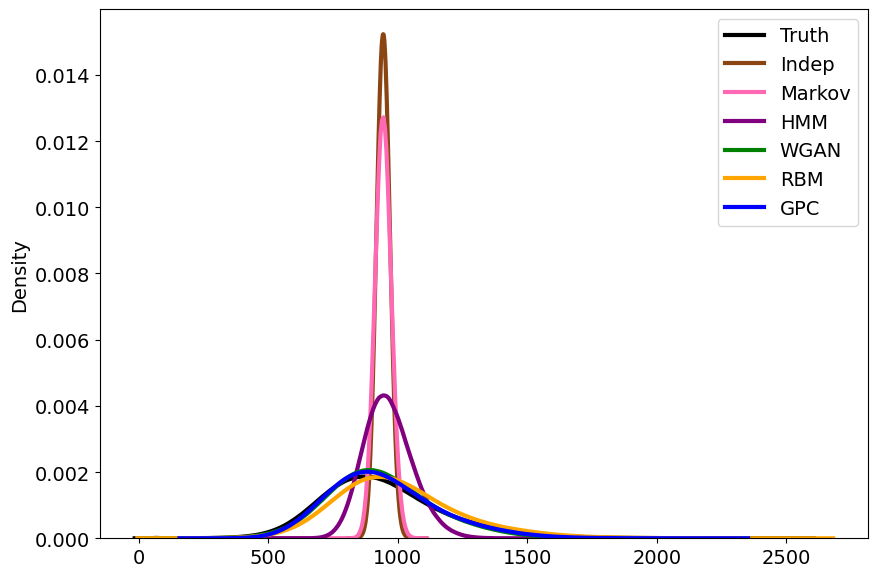

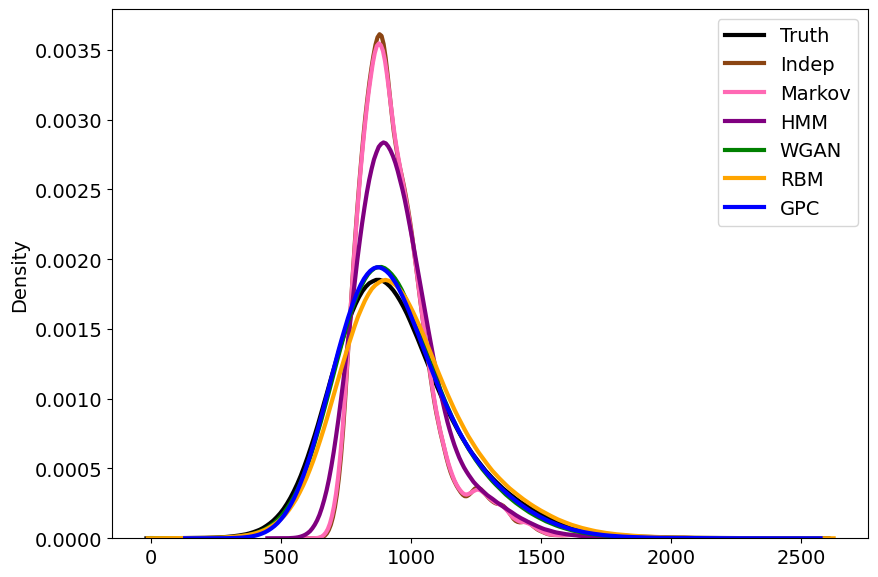

************************************************************************
*** Computation and plotting DIST/AATS DONE. Figures saved in ./FIGS/UKBB/to_minor_encoding-False;min_af-0;max_af-1;allchecks-0;n-21540/ ***
************************************************************************


In [8]:
DIST = True
AATS = True
boolComputeAATS = False # if already computed, can set this to false
%run -p {dirscript}/plotfig_utils_5_DIST_AATS.ipynb # computationally long